In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C:\\Users\\student\\Downloads\\box3.png")  
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

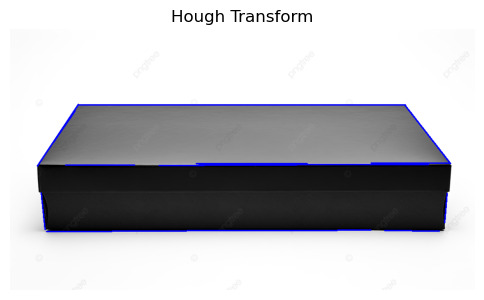

In [3]:
# Step 2: Hough Transform to detect lines
edges = cv2.Canny(gray_image, 100, 200)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

# Convert the grayscale image to a color image (BGR format)
color_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Draw the detected lines in red on the color image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(color_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color (BGR format)

# Display Hough Transform result
plt.figure(figsize=(6, 6))
plt.imshow(color_image)
plt.title('Hough Transform')
plt.axis('off')
plt.show()

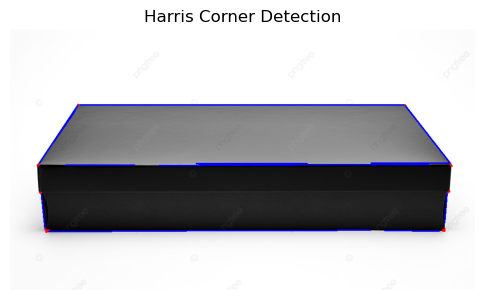

In [13]:
# Harris Corner Detection
corner_strength = cv2.cornerHarris(gray_image, 2, 3, 0.04)

# Normalize the corner strength for better visibility
corner_strength = cv2.dilate(corner_strength, None)  # Dilate to make corners more visible

# Mark the corners 
color_image[corner_strength > 0.01 * corner_strength.max()] = (255, 0, 0)  
plt.figure(figsize=(6, 6))
plt.imshow(color_image)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

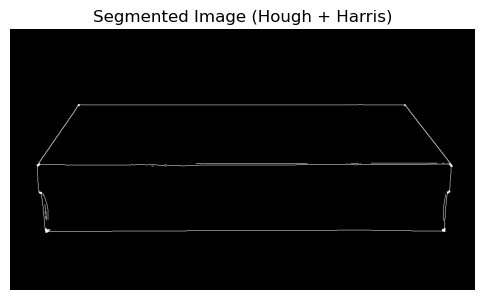

In [8]:
# Step 4: Create Segmentation Mask using Hough lines and Harris corners
segmented_image = np.zeros_like(gray_image)

# Create binary masks for edge and corner regions
edges_mask = np.zeros_like(gray_image)
edges_mask[edges > 0] = 255  

corner_mask = np.zeros_like(gray_image)
corner_mask[corner_strength > 0.01 * corner_strength.max()] = 255 

# Use bitwise OR to combine edge and corner detections
combined_mask = cv2.bitwise_or(edges_mask, corner_mask)

# Step 5: Create segmented image using white for the combined region (Hough + Harris)
segmented_image[combined_mask > 0] = 255 
plt.figure(figsize=(6, 6))
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Hough + Harris)')
plt.axis('off')
plt.show()

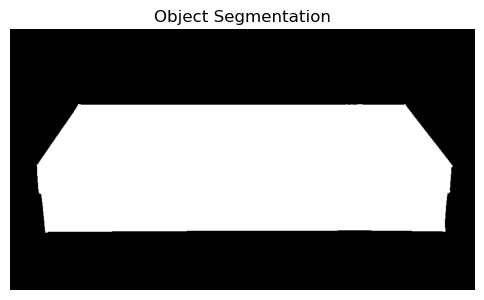

In [6]:
# Step 6: Find Contours in the combined mask (to isolate the object)
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw contours (segmented object)
object_segmented = np.zeros_like(image)

# Draw the contours (object boundaries)
cv2.drawContours(object_segmented, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Display Segmented Object result
plt.figure(figsize=(6, 6))
plt.imshow(object_segmented, cmap='gray')
plt.title('Object Segmentation')
plt.axis('off')
plt.show()